In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from string import punctuation
import string
from nltk.tokenize import word_tokenize
import regex as re
import emoji
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [117]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [118]:
# Tokenize words, remove stop words, lemmatizatin, and stemming
stop_words = set(stopwords.words('english') + list(string.punctuation))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [119]:
df = pd.read_csv('tweets.csv')

/var/folders/9x/sg299rqx48g64901_k2jkppm0000gq/T/ipykernel_1569/3690812706.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets.csv')


In [120]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
3412806,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659,False,2022-12-05 17:10:31+00:00,NaN,Twitter for Android
3412807,Green,Iterating back-and-forth with tools like #Chat...,🍁,NaN,2022-12-03 12:49:13+00:00,3.0,33.0,3,False,2022-12-05 17:09:22+00:00,['ChatGPT'],Twitter Web App
3412808,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it tak...,NaN,Mathematician and Developer @Amazon. Previousl...,2016-07-09 21:08:52+00:00,80.0,34.0,169,False,2022-12-05 17:09:04+00:00,['ChatGPT'],Twitter for Android
3412809,Devang,Was just wondering is there any difference bet...,United States,"passionate by nature, software developer by pr...",2015-05-19 03:17:06+00:00,15.0,86.0,307,False,2022-12-05 17:08:44+00:00,"['ChatGPT', 'GPT3']",Twitter for Android


In [121]:
df1 = df[:500]

In [122]:
df1

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [123]:
df1.columns

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

In [124]:
# remove the duplicate rows
def remove_duplicates(d):
        
        
        d = d.drop_duplicates()
        return d
    
    

In [125]:
df1 = remove_duplicates(df1)

In [126]:
df1.shape

(500, 12)

In [127]:
#remove rows with missing values
def remove_missing(d):
    
    d = d.dropna()
    return d



In [128]:
df1 = remove_missing(df1)

In [129]:
df1.shape

(274, 12)

In [130]:
# normalize, cean, remove stop words, stemming, lemmatization, remove punctuation, remove links, 
# remove special characters

In [131]:
#tokenization and normalizaion
def tokenize(text):
    return word_tokenize(text.lower())

In [132]:
#removing urls and punctuations
# Define function to remove URLs and punctuation
def clean(tweet):
    # Remove URLs using regular expressions
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'www\S+', '', tweet)
    return tweet

In [133]:
#converting emojis into words
def convert_emoji(tweet):
    tweet = emoji.demojize(tweet)
    tweet = tweet.replace(':', ' ')
    tweet = ' '.join(tweet.split())
    return tweet


In [134]:
df1['text'] = df1['text'].apply(clean)

In [135]:
df1['text'] = df1['text'].apply(convert_emoji)

In [136]:
df1['text'] = df1['text'].apply(tokenize)

In [137]:
#stop words removal
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [138]:
#stemming
def stem(tokens):
    return [stemmer.stem(word) for word in tokens]

In [139]:
#lemmatization
def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [140]:
df1['text'] = df1['text'].apply(remove_stopwords)
df1['text'] = df1['text'].apply(stem)
df1['text'] = df1['text'].apply(lemmatize)

In [141]:
# convert lists in a list into a single list
def flatten(l):
    return [item for sublist in l for item in sublist]


In [142]:
data = flatten(list(df1.text))

In [143]:
data

['chatgpt',
 'think',
 '5',
 'crypto',
 'coin',
 'explod',
 'year',
 'yahoo',
 'financ',
 'chatgpt',
 'ai',
 'openai',
 'new',
 'jwvanc',
 "'s",
 'post',
 '5',
 'startup',
 'includ',
 'vcinityinc',
 '1st',
 'startup50',
 'challeng',
 'thx',
 'chatgpt',
 'base',
 'answer',
 'macro-econom',
 'pressur',
 'vc',
 'fund',
 'track',
 'record',
 'manag',
 'team',
 'amp',
 'growth',
 'potenti',
 'market',
 'sector',
 'police_car_light',
 'get',
 'police_car_light',
 'money_bag',
 'binanc',
 'spot',
 'money_bag',
 'down_arrow',
 'recommend',
 'short',
 'red_circl',
 'ticker',
 'ghstusdt',
 'time',
 'interv',
 '5min',
 'last',
 'price',
 '0.956',
 'red_circl',
 'rsi',
 '88.3',
 'power',
 'chatgpt',
 'ghst',
 'ghst',
 'alphaquarktoken',
 '저스트',
 'gon',
 'na',
 'backhand_index_pointing_down',
 'long',
 'backhand_index_pointing_down',
 'wait',
 'backhand_index_pointing_down',
 'short',
 'video',
 'show',
 'compani',
 "'s",
 'logo',
 'base',
 'websit',
 'domain',
 'short',
 'laptop',
 'video_camera',

In [144]:
### N-gram Analysis
def ngrams():
    bigrams = []
    trigrams = []
    #bigrams
    for i in range(len(data) - 1):
        temp = data[i] + ' ' + data[i+1]        
        bigrams.append(temp)
        
    #trigrams
    for i in range(len(data) - 2):   
        temp1 = data[i] + ' ' + data[i+1]+ ' ' + data[i+2]
        trigrams.append(temp1)
    return bigrams, trigrams

In [145]:
bigrams, trigrams = ngrams()

In [146]:
bifreq = {x:bigrams.count(x) for x in bigrams}

In [147]:
top_counts1 = Counter(bifreq).most_common(10)
top_counts1

[('chatgpt ai', 22),
 ('power chatgpt', 22),
 ('last price', 20),
 ('ai chatgpt', 19),
 ('recommend short', 18),
 ('gon na', 17),
 ('use chatgpt', 16),
 ('ai openai', 15),
 ('police_car_light money_bag', 15),
 ('money_bag binanc', 15)]

In [148]:
trifreq = {x:trigrams.count(x) for x in trigrams}

In [149]:
top_counts2 = Counter(trifreq).most_common(10)
top_counts2

[('police_car_light money_bag binanc', 15),
 ('money_bag binanc spot', 15),
 ('binanc spot money_bag', 15),
 ('spot money_bag down_arrow', 15),
 ('money_bag down_arrow recommend', 15),
 ('down_arrow recommend short', 15),
 ('recommend short red_circl', 15),
 ('short red_circl ticker', 15),
 ('gon na backhand_index_pointing_down', 15),
 ('na backhand_index_pointing_down long', 15)]

In [150]:
####### display word cloud

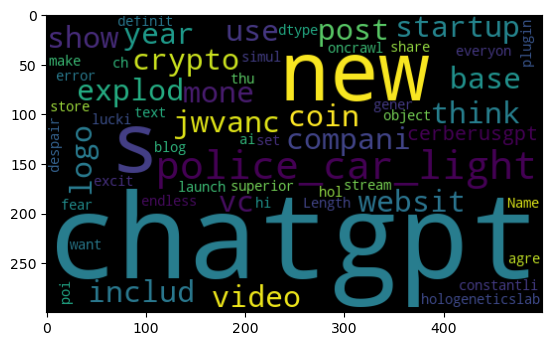

In [151]:
allwords=''.join( str(df1['text']))

word_Cloud=WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allwords)

plt.imshow(word_Cloud, interpolation='bilinear')

In [152]:
########## sentiment analysis

In [153]:
df1

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,"[chatgpt, think, 5, crypto, coin, explod, year...","Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,"[new, jwvanc, 's, post, 5, startup, includ, vc...",Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,"[police_car_light, get, police_car_light, mone...",Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,"[video, show, compani, 's, logo, base, websit,...","Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,"[use, cerberusgpt, hologeneticslab, simul, hol...","London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"[lucki, chatgpt, constantli, make, error, 'poi...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,"[hi, everyon, want, share, ai-gener, blog, thu...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,"[chatgpt, set, endless, stream, fear, despair,...","New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,"[excit, news, chatgpt, launch, plugin, store, ...",Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [154]:
df1['sentiment'] = df1['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)

In [155]:
# loading pre-trained models
from transformers import (
#                           TFRobertaForSequenceClassification,
                          RobertaForSequenceClassification,
                          RobertaTokenizer,
                         AdamW)


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: Failed to import transformers.optimization because of the following error (look up to see its traceback):
initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
######### feature engineering

In [156]:
## calculate the length of sentences

In [157]:
df1

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment
2,Dan Bruno AI,"[chatgpt, think, 5, crypto, coin, explod, year...","Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,0.000000
3,Georgiana Comsa,"[new, jwvanc, 's, post, 5, startup, includ, vc...",Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,-0.331818
4,Bitone Great,"[police_car_light, get, police_car_light, mone...",Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,-0.012500
6,ScrapeLogo: acquired by RiteKit in 2015,"[video, show, compani, 's, logo, base, websit,...","Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,-0.400000
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,"[use, cerberusgpt, hologeneticslab, simul, hol...","London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"[lucki, chatgpt, constantli, make, error, 'poi...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,0.142857
494,Janice Portal | AI Enthusiast | Virtual Assistant,"[hi, everyon, want, share, ai-gener, blog, thu...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,0.000000
495,O'Dwyer's PR News,"[chatgpt, set, endless, stream, fear, despair,...","New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,-0.062500
497,Tom Solid,"[excit, news, chatgpt, launch, plugin, store, ...",Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,0.200000


In [158]:
#### Vectorization

In [159]:
# applying tf-idf
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df1['text'].apply(lambda x: ' '.join(x)))
Tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

In [160]:
# applying countvectorizer 
count_vect = CountVectorizer()
X_counts1 = count_vect.fit_transform(df1['text'].apply(lambda x: ' '.join(x)))
CountVect_df = pd.DataFrame(X_counts1.toarray(), columns = count_vect.get_feature_names_out())

In [161]:
CountVect_df 

,00334,00618,0062,01635,0197,0334,068,10,100,11,...,シェイクペイ,デジバイト,バイビット,바이비트,비트코인,알파,어드벤처골드,이캐시,저스트,코스모스
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
## Define a function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Print the evaluation metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)


In [163]:
df2 = df1

In [164]:
def combine(text):
     return ' '.join(text)

In [165]:
df2['text'] = df2['text'].apply(combine)

In [175]:
### doc2vec

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df2['text'])]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, epochs=40)

df1_doc2vec = pd.DataFrame(doc2vec_model.dv.vectors)

In [177]:
df1_doc2vec 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.047913,0.062883,-0.005625,0.073055,0.027432,-0.092641,0.016473,0.102892,-0.120055,-0.112240,...,0.026060,0.145706,-0.019275,0.016230,0.143505,0.038286,0.025196,-0.014593,0.077426,0.081620
1,-0.045187,-0.042343,0.024653,-0.039832,-0.146028,-0.044188,-0.072126,0.107457,0.092054,-0.000007,...,0.049238,0.165658,0.018512,-0.109034,0.036940,-0.008262,-0.173541,-0.000477,0.009784,0.094840
2,0.394309,-0.122388,-0.275994,-0.150350,0.185654,-0.181354,0.166526,0.072419,-0.147615,-0.312592,...,0.055502,0.020334,0.107555,0.147701,0.476089,-0.058322,0.080553,0.034133,0.046054,-0.157321
3,-0.008311,0.011309,0.004135,-0.004538,0.091923,-0.094216,0.186465,0.137851,-0.190120,-0.267868,...,0.161177,0.001313,-0.073504,0.136065,0.208022,0.079423,0.250425,-0.067714,0.121796,-0.028446
4,-0.334511,0.037648,0.164789,0.054367,-0.047203,0.009466,0.041773,0.175165,-0.055180,-0.062363,...,0.138389,0.138945,-0.062306,-0.015059,-0.075266,0.093460,0.184979,-0.009925,0.142673,0.162074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.158524,-0.005246,0.044902,-0.001158,0.108232,0.037277,0.107074,0.135819,-0.044715,-0.126343,...,0.060024,0.044232,-0.001799,0.061902,0.053179,0.067248,0.188853,0.006182,0.095834,0.061231
270,-0.086156,0.020818,0.033305,0.011166,0.066525,-0.012393,0.074729,0.126394,-0.059653,-0.115970,...,0.055760,0.068643,0.002349,0.026148,0.112412,0.085173,0.083518,-0.016296,0.080777,0.040555
271,-0.160932,-0.015460,0.125496,0.049678,-0.036979,0.023941,0.080922,0.181855,-0.017999,-0.079123,...,0.098218,0.036881,-0.058245,0.032658,-0.079236,-0.061093,0.162549,0.069392,0.146999,0.121668
272,-0.165938,0.010928,0.052990,0.035554,0.070719,-0.056861,0.083198,0.136073,-0.132144,-0.171304,...,0.139763,0.055225,-0.054396,0.075881,0.085896,0.118032,0.226249,-0.096644,0.098186,0.063079


In [176]:
# calculating correlation

In [180]:
df1

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,sentiment
2,Dan Bruno AI,chatgpt think 5 crypto coin explod year yahoo ...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,0.000000
3,Georgiana Comsa,new jwvanc 's post 5 startup includ vcinityinc...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,-0.331818
4,Bitone Great,police_car_light get police_car_light money_ba...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,-0.012500
6,ScrapeLogo: acquired by RiteKit in 2015,video show compani 's logo base websit domain ...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,-0.400000
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,use cerberusgpt hologeneticslab simul hologene...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,lucki chatgpt constantli make error 'point err...,"Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,0.142857
494,Janice Portal | AI Enthusiast | Virtual Assistant,hi everyon want share ai-gener blog thumbs_up ...,"Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,0.000000
495,O'Dwyer's PR News,chatgpt set endless stream fear despair closer...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,-0.062500
497,Tom Solid,excit news chatgpt launch plugin store mark co...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.,0.200000


In [178]:
correlation = df1.corr()

/var/folders/9x/sg299rqx48g64901_k2jkppm0000gq/T/ipykernel_1569/3349972549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


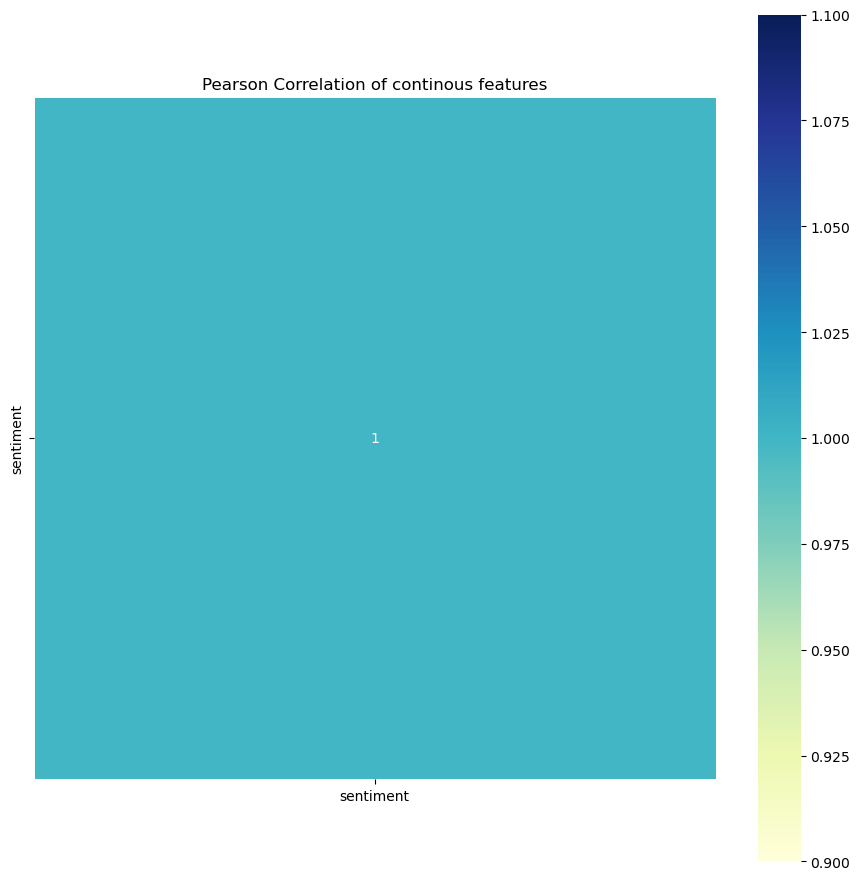

In [179]:
# plot the heatmap showing calculated correlations
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(correlation, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                );

In [182]:
label1 = df1.sentiment

In [183]:
### information gain

In [186]:
df3 = df1
df3 = df3.drop(columns=['text'])

In [187]:
# determine the mutual information
mutual_info = mutual_info_classif(df3, df3)
mutual_info

TypeError: '<' not supported between instances of 'float' and 'str'